In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math
from classy import Class

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [10]:
var_name = 'log10_axion_ac'
var_min = -3.8
var_max = var_min + 0.5
var_num = 5
var_legend = 'log10_axion_ac'
var_figname = '2log10_axion_ac'

In [11]:
var2_name = 'log10_fraction_axion_ac'
var2_min = 0.02
var2_max = var2_min + 0.08
var2_num = 5
var2_legend = 'log10_fraction_axion_ac'
var2_figname = 'log10_fraction_axion_ac'

 * Compute with log10_axion_ac=-3.800000e+00
 * Compute with log10_fraction_axion_ac=2.000000e-02
 * Compute with log10_axion_ac=-3.675000e+00
 * Compute with log10_fraction_axion_ac=4.000000e-02
 * Compute with log10_axion_ac=-3.550000e+00
 * Compute with log10_fraction_axion_ac=6.000000e-02
 * Compute with log10_axion_ac=-3.425000e+00
 * Compute with log10_fraction_axion_ac=8.000000e-02
 * Compute with log10_axion_ac=-3.300000e+00
 * Compute with log10_fraction_axion_ac=1.000000e-01


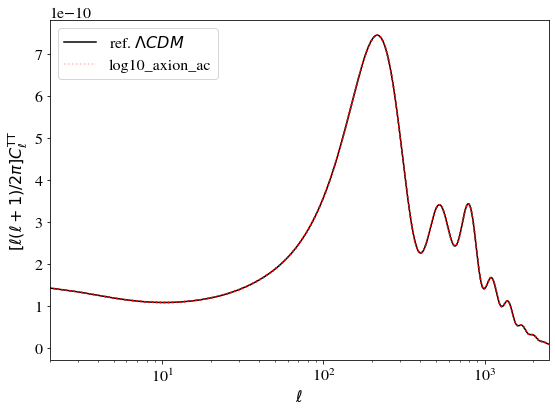

In [21]:
# Fixed settings
#
common_settings = {"output":'tCl,lCl',
                   "lensing": 'yes',
                   "A_s": 2.176e-9,  
                   "n_s": 0.9812,
                   "h": 0.7352,
                   "omega_b": 0.02255,
                   "omega_cdm": 0.1272,
                   "tau_reio": 0.068,
                   #'Omega_Lambda': 0.7,
                   "Omega_fld": 0,
                   "Omega_scf": 0.01,
                   "n_axion": 3,
                   "scf_tuning_index": 0,
                   "scf_parameters": '0.1,0',
                   "scf_potential": "axion",}

# arrays for output
#
#kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
fig_TT, ax_TT = plt.subplots()
#
# loop over varying parameter values
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    var2 = var2_min + (var2_max-var2_min)*i/(var2_num-1.)
    #
    print (' * Compute with %s=%e'%(var_name,var))
    print (' * Compute with %s=%e'%(var2_name,var2))
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        linestyle_a = '-'
        var_alpha = 1.
        legarray.append(r'ref. $\Lambda CDM$')
    else:
        var_color = 'r'
        var_alpha = 1.*i/(var_num-1.)
        linestyle_a = ':'
    if i == var_num-1:
        legarray.append(var_legend)
    #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({var_name: var})
    M.set({var2_name: math.log10(var2)})
    M.compute()
    #
    # get Cls
    #
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    #print(clM)
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha, linestyle = linestyle_a)
    #ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var2_color,alpha=var2_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)